#### Import data

In [2]:
def csv2dict(filename):
    with open(filename, "r") as target:
        linesasList = []
        studentInfo = []
        print("\n Reading the lines of the file... ")
        for line in target:
            linesasList.append(line) # to add all the lines of the csv file into a list
        print(" All lines have been read and stored in the variable 'linesasList' ")

        for line in linesasList[1:]:
            # for each value in the CSV file, after the headers, create a dictionary with the following categories for each line.
            tutorial_group, student_id, school, name, gender, cgpa = line.strip().split(',')

            studentInfoAsDict = {
            'Tutorial Group': int(tutorial_group.strip("G-")),
            'Student ID': student_id,
            'Name': name,
            'School': school,
            'Gender': gender,
            'CGPA': float(cgpa)
            }
            
            studentInfo.append(studentInfoAsDict)
        print(" All student data has been stored into the list 'studentInfo' ")
    return studentInfo

def studentsAsTutorialGroupLists(list):
    counter = 0
    sortedInto120Lists = []
    temporaryList = []
    for i in list:
        counter += 1
        if counter % 50 == 0:
            temporaryList.append(i)
            sortedInto120Lists.append(temporaryList)
            temporaryList = []
        else:
            temporaryList.append(i)
    return sortedInto120Lists



student_list = csv2dict("records.csv")
tutorial_group_list = studentsAsTutorialGroupLists(csv2dict("records.csv"))


 Reading the lines of the file... 
 All lines have been read and stored in the variable 'linesasList' 
 All student data has been stored into the list 'studentInfo' 

 Reading the lines of the file... 
 All lines have been read and stored in the variable 'linesasList' 
 All student data has been stored into the list 'studentInfo' 


In [3]:
import matplotlib.pyplot as plt
font1 = {'family' : 'Times New Roman',
'weight' : 'normal',
'size'   : 23,
}

#### Breifly go through the data

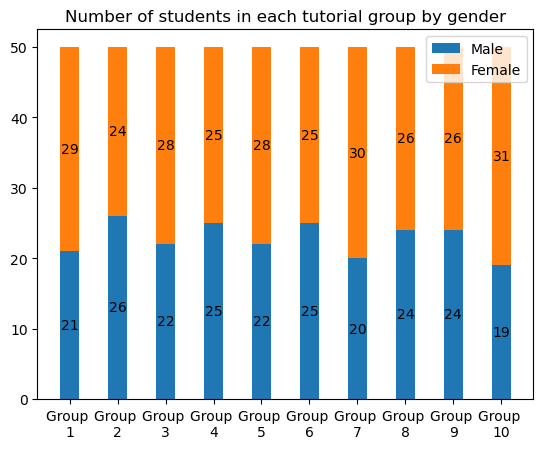

In [4]:
num_of_tutorial_group = 10
male_count = []
female_count = []
width = 0.4

for i in range(num_of_tutorial_group):
    tutorial_group = tutorial_group_list[i]
    gender_male = sum([i["Gender"]=="Male" for i in tutorial_group])
    gender_female = sum([i["Gender"]=="Female" for i in tutorial_group])
    male_count.append(gender_male)
    female_count.append(gender_female)

groups = tuple("Group \n"+str(i+1) for i in range(num_of_tutorial_group))
sex_counts = {"Male":male_count,"Female":female_count}
fig, ax = plt.subplots()
bottom = [0 for i in range(num_of_tutorial_group)]

for key,index in sex_counts.items():
    graph = ax.bar(groups,index,width,label = key,bottom=bottom)
    for j in range(len(index)):
        bottom[j] += index[j]
    ax.bar_label(graph, label_type='center')

ax.set_title('Number of students in each tutorial group by gender')
ax.legend()

plt.show()       



In [5]:
def extract_feature(dictionary,key):
    output = [i[key] for i in dictionary]
    return output


def sns_input(dictionary):
    features = dictionary[0].keys()
    print(features)
    output_dict = {}
    for feature in features:
        f_list= extract_feature(dictionary,feature)
        output_dict.update({feature:f_list})

    return output_dict


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


dict_keys(['Tutorial Group', 'Student ID', 'Name', 'School', 'Gender', 'CGPA'])
dict_keys(['Tutorial Group', 'Student ID', 'Name', 'School', 'Gender', 'CGPA'])


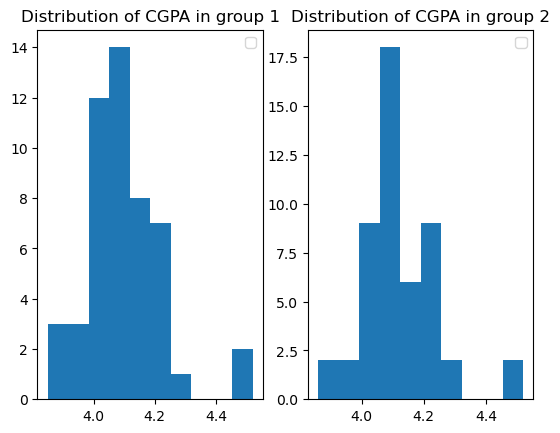

In [6]:
fig, axs = plt.subplots(1, 2)

for i in range(len(axs)):
    axs[i].hist(sns_input(tutorial_group_list[i])["CGPA"])
    axs[i].set_title('Distribution of CGPA in group '+str(i+1))
    axs[i].legend()
plt.show() 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


dict_keys(['Tutorial Group', 'Student ID', 'Name', 'School', 'Gender', 'CGPA'])


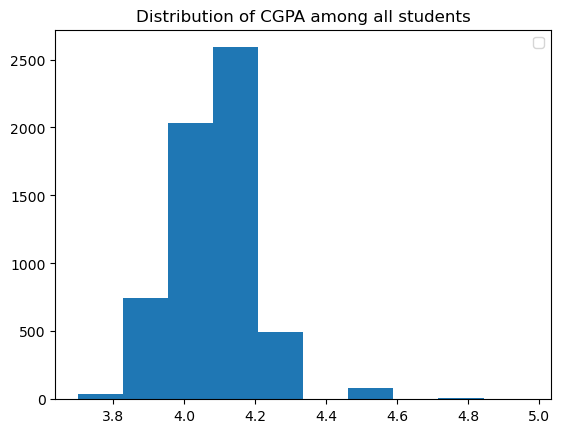

In [10]:
plt.hist(sns_input(student_list)["CGPA"])
plt.title('Distribution of CGPA among all students')
plt.legend()

In [11]:
school = sns_input(tutorial_group_list[2])["School"]
name_list = {}
for i in school:
    if i in name_list:
        name_list[i]+=1
    else:
        name_list[i] = 1

dict_keys(['Tutorial Group', 'Student ID', 'Name', 'School', 'Gender', 'CGPA'])


Text(0.5, 1.0, 'Distribution by school in each group')

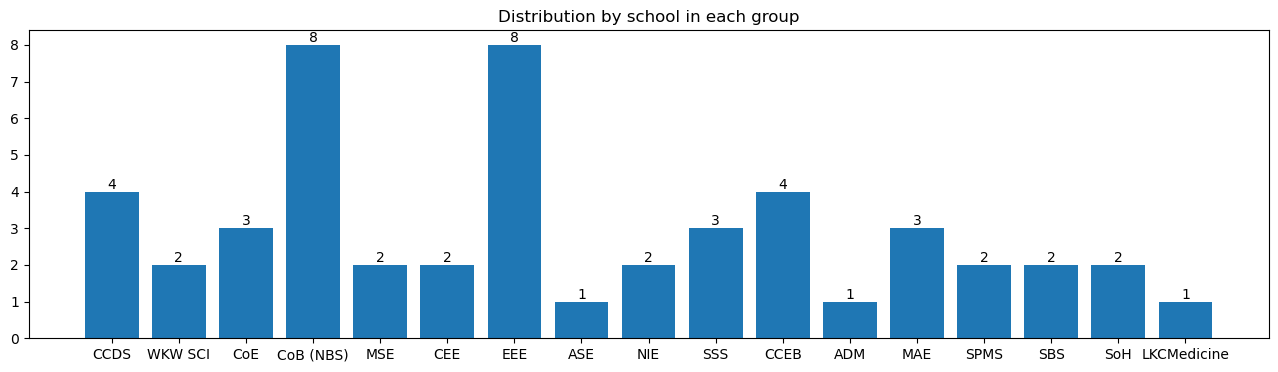

In [12]:
fig, ax = plt.subplots(figsize=(16,4))
graph = ax.bar(name_list.keys(),name_list.values())
ax.bar_label(graph)
ax.set_title('Distribution by school in each group')

In [14]:
school = sns_input(student_list)["Name"]
name_list = {}
for i in school:
    if i in name_list:
        name_list[i]+=1
    else:
        name_list[i] = 1


dict_keys(['Tutorial Group', 'Student ID', 'Name', 'School', 'Gender', 'CGPA'])


Text(0.5, 1.0, 'Distribution by school in each group')

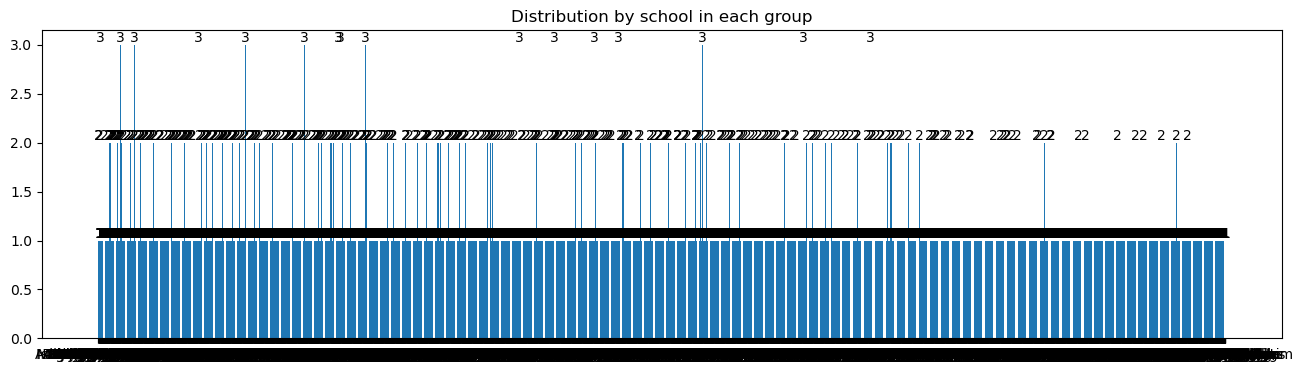

In [15]:
fig, ax = plt.subplots(figsize=(16,4))
graph = ax.bar(name_list.keys(),name_list.values())
ax.bar_label(graph)
ax.set_title('Distribution by school in each group')